In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
#Loads the dataset from a local CSV file into a Pandas DataFrame named df.
df = pd.read_csv(r'C:\Users\ADMIN\Prachi ML\SNA.csv')

In [ ]:
# Displays the first 5 rows of the dataset to understand its structure and columns.
df.head()

,Age,Salary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,47,25000,1
4,27,57000,0


In [ ]:
# Checks for missing/null values in each column of the dataset.
df.isnull().sum()

Age          0
Salary       0
Purchased    0
dtype: int64

In [ ]:
# Separates the dataset into X AND Y
x = df.drop('Purchased',axis=1)
y = df['Purchased']

In [ ]:
# Imports StandardScaler to standardize features. This scales data to have mean = 0 and standard deviation = 1, improving SVM performance.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [ ]:
# Splits dataset into training (80%) and testing (20%) sets with a fixed random state for reproducibility.
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2,random_state =42)

In [ ]:
# Imports SVC (Support Vector Classifier) from scikit-learn.
from sklearn.svm import SVC

In [ ]:
# Creates and trains an SVM model with a linear kernel.
model = SVC(kernel = 'linear',C = 1)
model.fit(x_train,y_train).score(x_test,y_test)

0.8245614035087719

In [ ]:
# Predicts target values (Purchased) for the test dataset.
y_pred = model.predict(x_test)

In [ ]:
# Evaluates model performance using:
# accuracy_score → Overall correctness
# confusion_matrix → Shows TP, TN, FP, FN
# classification_report → Precision, Recall, F1-score

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
acc = accuracy_score(y_test,y_pred)
conf = confusion_matrix(y_test,y_pred)
report = classification_report(y_test,y_pred)

print(acc)
print(conf)
print(report)

0.8245614035087719
[[28  4]
 [ 6 19]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        32
           1       0.83      0.76      0.79        25

    accuracy                           0.82        57
   macro avg       0.82      0.82      0.82        57
weighted avg       0.82      0.82      0.82        57



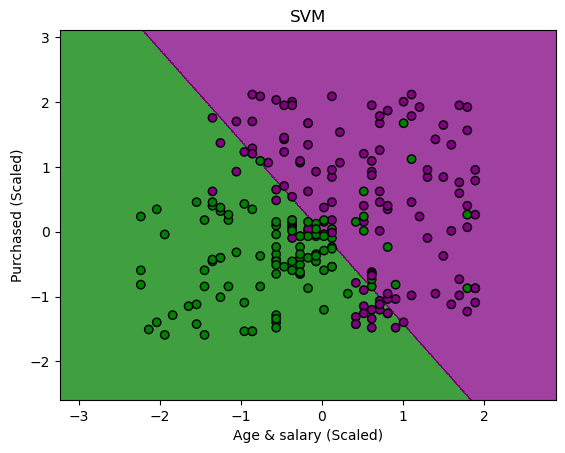

In [ ]:
# Visualizes decision boundary for the linear kernel model.
# Uses a meshgrid to create feature space
# Plots regions classified as different classes with colors

from matplotlib.colors import ListedColormap

x_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(x_set[:, 0].min() - 1, x_set[:, 0].max() + 1, 0.01),
                     np.arange(x_set[:, 1].min() - 1, x_set[:, 1].max() + 1, 0.01))

plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap=ListedColormap(('green', 'purple')))
plt.scatter(x_set[:, 0], x_set[:, 1], c=y_set, edgecolors='k', marker='o', cmap=ListedColormap(('green', 'purple')))
plt.xlabel('Age & salary (Scaled)')
plt.ylabel('Purchased (Scaled)')
plt.title('SVM')
plt.show()

In [ ]:
# Trains SVM with a Polynomial kernel to capture non-linear decision boundaries.
model = SVC(kernel = 'poly',C = 2)
model.fit(x_train,y_train).score(x_test,y_test)

0.8070175438596491

In [ ]:
# Makes predictions using the polynomial kernel model.
y_pred = model.predict(x_test)

In [ ]:
# Evaluates polynomial model using accuracy, confusion matrix, and classification report.

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
acc = accuracy_score(y_test,y_pred)
conf = confusion_matrix(y_test,y_pred)
report = classification_report(y_test,y_pred)

print(acc)
print(conf)
print(report)

0.8070175438596491
[[30  2]
 [ 9 16]]
              precision    recall  f1-score   support

           0       0.77      0.94      0.85        32
           1       0.89      0.64      0.74        25

    accuracy                           0.81        57
   macro avg       0.83      0.79      0.79        57
weighted avg       0.82      0.81      0.80        57



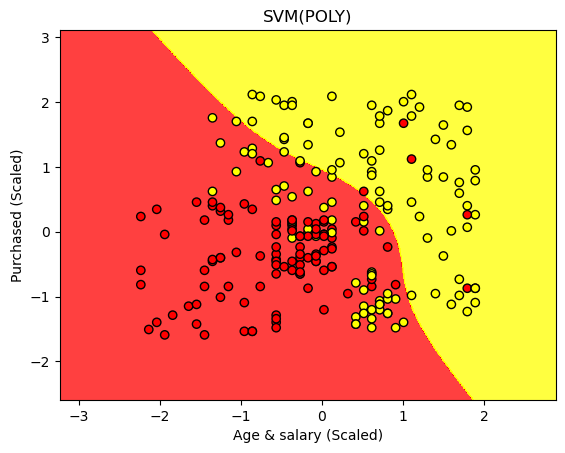

In [ ]:
# Plots decision boundary for Polynomial kernel.

from matplotlib.colors import ListedColormap

x_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(x_set[:, 0].min() - 1, x_set[:, 0].max() + 1, 0.01),
                     np.arange(x_set[:, 1].min() - 1, x_set[:, 1].max() + 1, 0.01))

plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap=ListedColormap(('red', 'yellow')))
plt.scatter(x_set[:, 0], x_set[:, 1], c=y_set, edgecolors='k', marker='o', cmap=ListedColormap(('red', 'yellow')))
plt.xlabel('Age & salary (Scaled)')
plt.ylabel('Purchased (Scaled)')
plt.title('SVM(POLY)')
plt.show()

In [ ]:
# Trains SVM with RBF (Radial Basis Function) kernel, good for complex non-linear patterns.
model = SVC(kernel = 'rbf',C = 2)
model.fit(x_train,y_train).score(x_test,y_test)

0.9473684210526315

In [ ]:
# Makes predictions using the RBF kernel model.

y_pred = model.predict(x_test)

In [ ]:
# Evaluates RBF model with same metrics.

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
acc = accuracy_score(y_test,y_pred)
conf = confusion_matrix(y_test,y_pred)
report = classification_report(y_test,y_pred)

print(acc)
print(conf)
print(report)

0.9473684210526315
[[29  3]
 [ 0 25]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        32
           1       0.89      1.00      0.94        25

    accuracy                           0.95        57
   macro avg       0.95      0.95      0.95        57
weighted avg       0.95      0.95      0.95        57



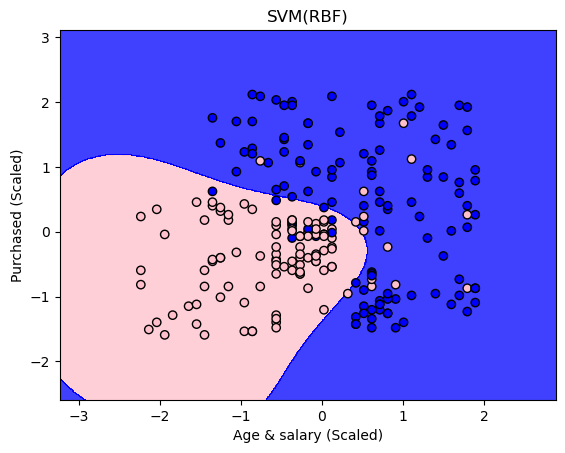

In [ ]:
# Plots decision boundary for RBF kernel.

from matplotlib.colors import ListedColormap

x_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(x_set[:, 0].min() - 1, x_set[:, 0].max() + 1, 0.01),
                     np.arange(x_set[:, 1].min() - 1, x_set[:, 1].max() + 1, 0.01))

plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha=0.75, cmap=ListedColormap(('pink', 'blue')))
plt.scatter(x_set[:, 0], x_set[:, 1], c=y_set, edgecolors='k', marker='o', cmap=ListedColormap(('pink', 'blue')))
plt.xlabel('Age & salary (Scaled)')
plt.ylabel('Purchased (Scaled)')
plt.title('SVM(RBF)')
plt.show()